       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

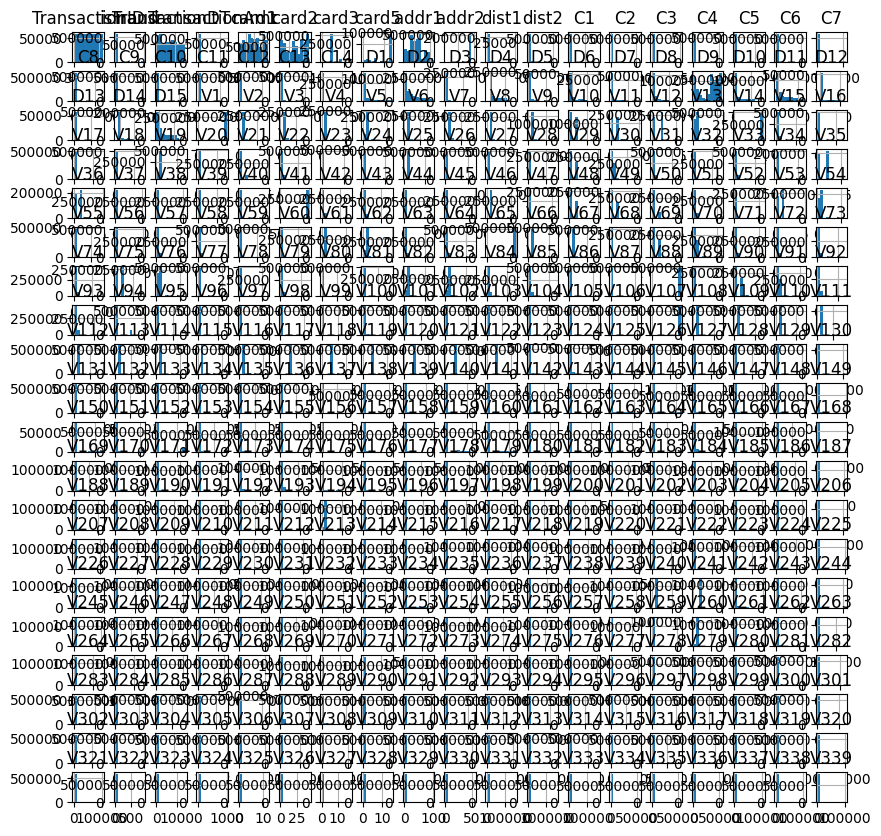

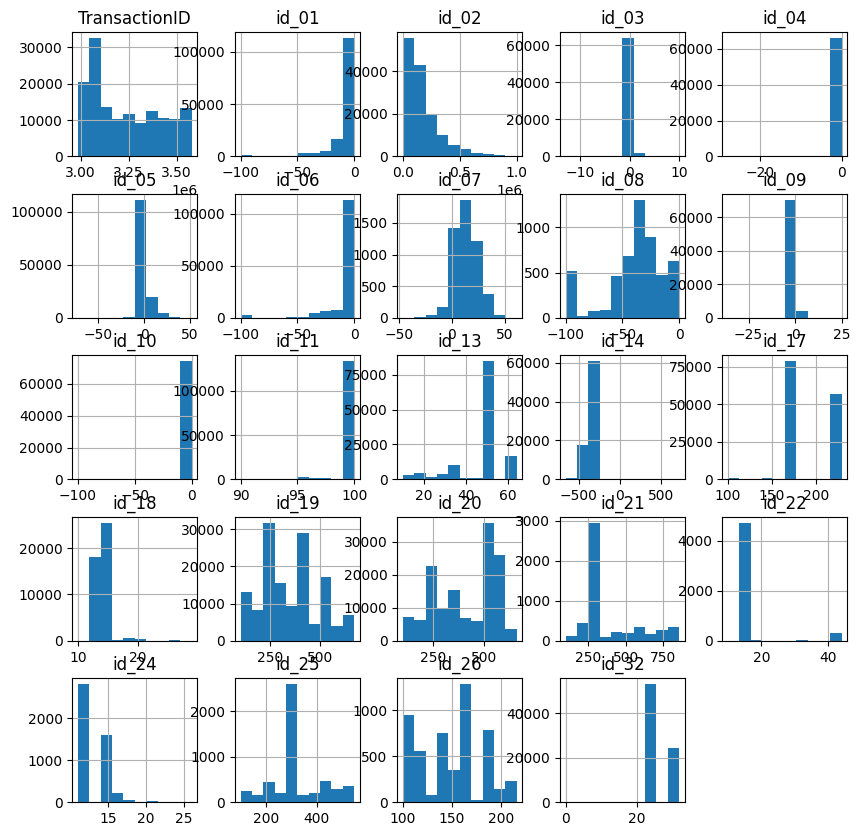

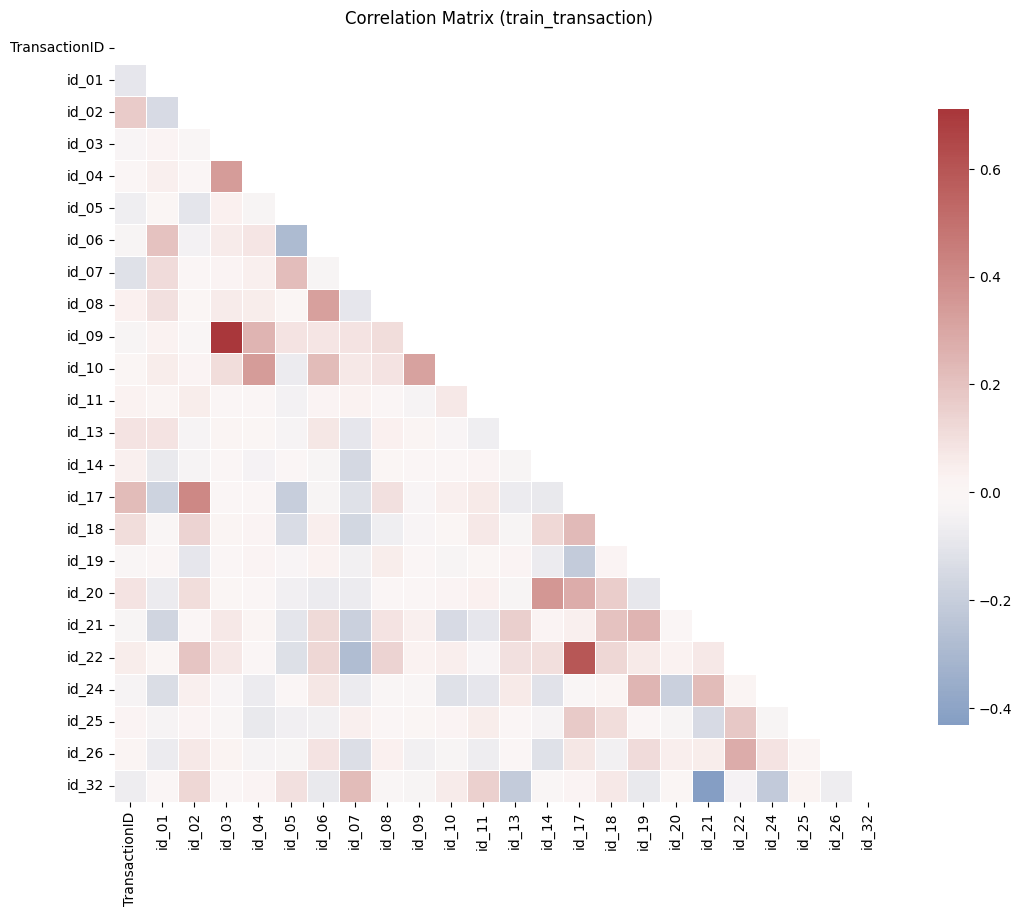

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np

# Load data from parquet for faster processing
base_dir = Path("./fraud_detection")
train_transaction = pd.read_csv("/Users/denco_23/Documents/Second_Brain/01_Projects/AI/Data_Science_Projects/Credit_Default/fraud_detection/data/preprocessed/train_transaction_cleaned.csv")
train_identity = pd.read_csv("/Users/denco_23/Documents/Second_Brain/01_Projects/AI/Data_Science_Projects/Credit_Default/fraud_detection/data/preprocessed/train_identity_cleaned.csv")

# Get summary statistics of the data
print(train_transaction.describe())
print(train_identity.describe())

# Plot histograms of the data
train_transaction.hist(figsize=(10, 10))
plt.show()

train_identity.hist(figsize=(10, 10))
plt.show()

# Plot correlation matrix of the data
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=False, 
    cmap="vlag", 
    center=0, 
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .8}
)
plt.title("Correlation Matrix (train_transaction)")
plt.show()



Loading train_transaction data...
Loading train_identity data...
Transaction data shape: (590540, 394)
Identity data shape: (144233, 41)
Transaction memory usage: 1217.40 MB
Identity memory usage: 140.21 MB

=== Transaction Dataset Overview ===
Shape: (590540, 394)
Memory usage: 1217.40 MB
Using sample of 10000 rows for visualization

Data Types:
float32    376
object      14
int32        2
int8         1
int16        1
Name: count, dtype: int64

Missing Values:
dist2    93.628374
D7       93.409930
D13      89.509263
D14      89.469469
D12      89.041047
D6       87.606767
D9       87.312290
D8       87.312290
V153     86.123717
V139     86.123717
dtype: float64

=== Identity Dataset Overview ===
Shape: (144233, 41)
Memory usage: 140.21 MB
Using sample of 5000 rows for visualization

Data Types:
float32    23
object     17
int32       1
Name: count, dtype: int64

Missing Values:
id_24    96.708798
id_25    96.441868
id_07    96.425922
id_08    96.425922
id_21    96.423149
id_26    96.

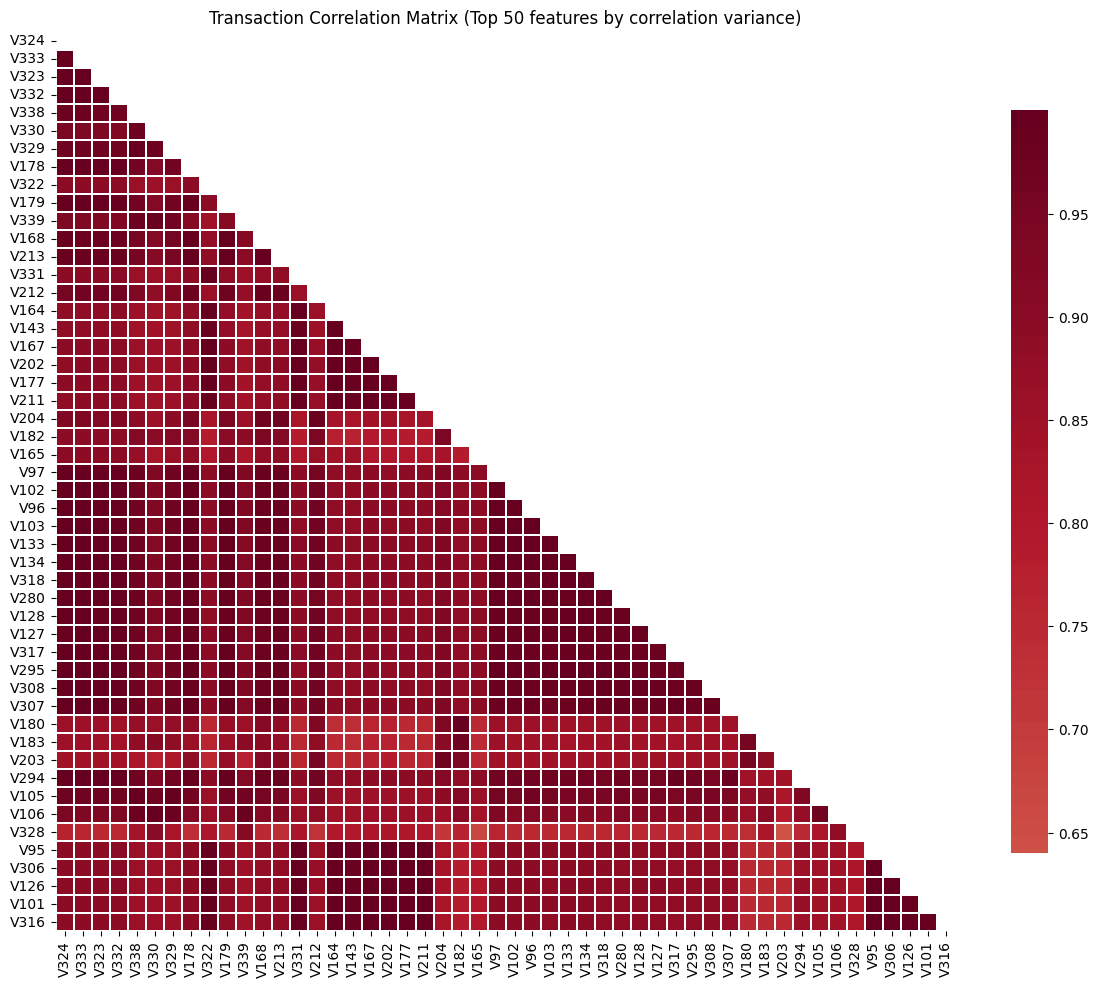

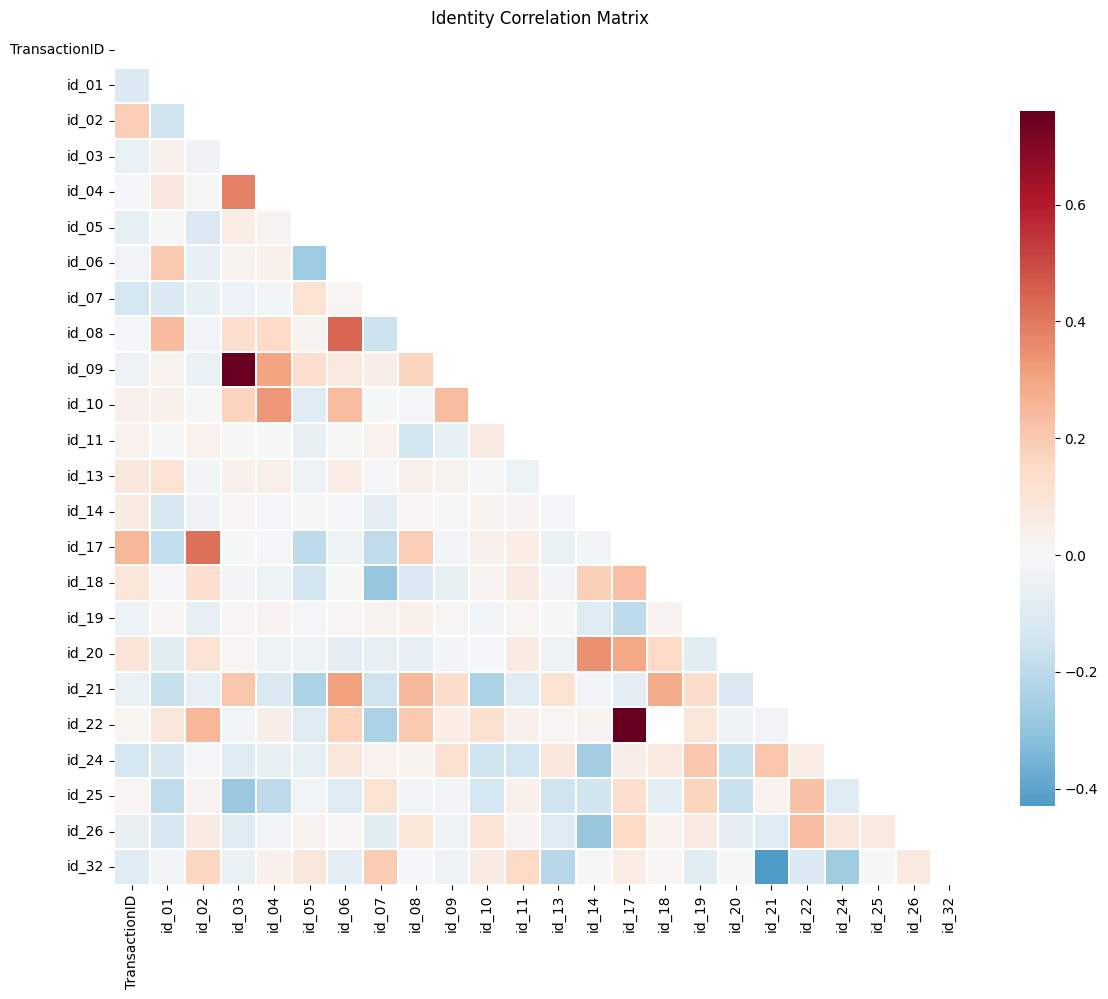


=== Summary Statistics for Transaction ===

Key Statistics:
       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027161   
std     1.704744e+05       0.183755   4.617224e+06      239.162521   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.320999   
50%     3.282270e+06       0.000000   7.306528e+06       68.769001   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.390625   

               card1  
count  590540.000000  
mean     9898.734658  
std      4901.170153  
min      1000.000000  
25%      6019.000000  
50%      9678.000000  
75%     14184.000000  
max     18396.000000  

Potential Data Issues:
Highly skewed columns (|skewness| > 3):
  isFraud: 5.06
  TransactionAmt: 14.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np
import gc  # For garbage collection

# Memory optimization function
def optimize_dtypes(df):
    """Optimize data types to reduce memory usage"""
    for col in df.columns:
        if df[col].dtype == 'object':
            continue
        elif df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

# Load data with memory optimization
def load_data_efficiently():
    """Load data with optimized memory usage"""
    print("Loading train_transaction data...")
    train_transaction = pd.read_parquet("/Users/denco_23/Documents/Second_Brain/01_Projects/AI/Data_Science_Projects/Credit_Default/fraud_detection/data/raw/train_transaction.parquet")
    
    print("Loading train_identity data...")
    train_identity = pd.read_parquet("/Users/denco_23/Documents/Second_Brain/01_Projects/AI/Data_Science_Projects/Credit_Default/fraud_detection/data/raw/train_identity.parquet")
    
    # Optimize data types
    train_transaction = optimize_dtypes(train_transaction)
    train_identity = optimize_dtypes(train_identity)
    
    print(f"Transaction data shape: {train_transaction.shape}")
    print(f"Identity data shape: {train_identity.shape}")
    print(f"Transaction memory usage: {train_transaction.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Identity memory usage: {train_identity.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    return train_transaction, train_identity

# Load the data
train_transaction, train_identity = load_data_efficiently()

# Basic exploration with sampling for large datasets
def explore_data_efficiently(df, name, sample_size=10000):
    """Efficiently explore large datasets"""
    print(f"\n=== {name} Dataset Overview ===")
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Sample for initial exploration if dataset is large
    if len(df) > sample_size:
        df_sample = df.sample(n=sample_size, random_state=42)
        print(f"Using sample of {sample_size} rows for visualization")
    else:
        df_sample = df
    
    print("\nData Types:")
    print(df.dtypes.value_counts())
    
    print("\nMissing Values:")
    missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    print(missing_pct[missing_pct > 0].head(10))
    
    return df_sample

# Explore both datasets
transaction_sample = explore_data_efficiently(train_transaction, "Transaction", 10000)
identity_sample = explore_data_efficiently(train_identity, "Identity", 5000)

# Efficient correlation analysis
def analyze_correlations_efficiently(df, name, threshold=0.7, sample_size=5000):
    """Analyze correlations efficiently for large datasets"""
    print(f"\n=== Correlation Analysis for {name} ===")
    
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(f"Analyzing {len(numeric_cols)} numeric columns")
    
    # Sample if dataset is too large
    if len(df) > sample_size:
        df_numeric = df[numeric_cols].sample(n=sample_size, random_state=42)
    else:
        df_numeric = df[numeric_cols]
    
    # Calculate correlation matrix
    corr_matrix = df_numeric.corr()
    
    # Find highly correlated pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })
    
    if high_corr_pairs:
        print(f"Found {len(high_corr_pairs)} highly correlated pairs (|r| > {threshold}):")
        for pair in high_corr_pairs[:10]:  # Show top 10
            print(f"  {pair['feature1']} - {pair['feature2']}: {pair['correlation']:.3f}")
    
    return corr_matrix

# Analyze correlations
transaction_corr = analyze_correlations_efficiently(train_transaction, "Transaction")
identity_corr = analyze_correlations_efficiently(train_identity, "Identity")

# Efficient visualization function
def plot_correlation_heatmap(corr_matrix, title, max_features=50):
    """Plot correlation heatmap with size limits"""
    if corr_matrix.shape[0] > max_features:
        # Select features with highest variance in correlations
        corr_var = corr_matrix.var().sort_values(ascending=False)
        top_features = corr_var.head(max_features).index
        corr_matrix = corr_matrix.loc[top_features, top_features]
        title += f" (Top {max_features} features by correlation variance)"
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr_matrix, 
        mask=mask, 
        annot=False, 
        cmap="RdBu_r", 
        center=0, 
        square=True, 
        linewidths=0.1, 
        cbar_kws={"shrink": 0.8}
    )
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot correlation heatmaps
plot_correlation_heatmap(transaction_corr, "Transaction Correlation Matrix")
plot_correlation_heatmap(identity_corr, "Identity Correlation Matrix")

# Memory cleanup
gc.collect()

# Summary statistics for key features
def summary_statistics(df, name):
    """Generate summary statistics efficiently"""
    print(f"\n=== Summary Statistics for {name} ===")
    
    # Select numeric columns only
    numeric_df = df.select_dtypes(include=[np.number])
    
    if len(numeric_df.columns) > 0:
        print("\nKey Statistics:")
        stats = numeric_df.describe()
        print(stats.iloc[:, :5])  # Show first 5 columns
        
        # Check for potential issues
        print("\nPotential Data Issues:")
        
        # Check for constant columns
        constant_cols = [col for col in numeric_df.columns if numeric_df[col].nunique() <= 1]
        if constant_cols:
            print(f"Constant columns: {constant_cols}")
        
        # Check for highly skewed columns
        skewed_cols = []
        for col in numeric_df.columns:
            if not numeric_df[col].isnull().all():
                skewness = numeric_df[col].skew()
                if abs(skewness) > 3:
                    skewed_cols.append((col, skewness))
        
        if skewed_cols:
            print("Highly skewed columns (|skewness| > 3):")
            for col, skew in skewed_cols[:5]:
                print(f"  {col}: {skew:.2f}")

summary_statistics(train_transaction, "Transaction")
summary_statistics(train_identity, "Identity")